#AUTOMOBILES - GM


In [ ]:
import pandas_datareader as pdr;
import datetime;
import pandas as pd;

#Showing the Values of the Date by setting up of the Data.
start=datetime.datetime(2018,1,1);
end=datetime.datetime(2024,7,20);

#Printing the Satrt and the end date.
print("\n 1. Starting Date of the Market: ",start);
print("\n 2. Ending Date of the Market: ",end);


 1. Starting Date of the Market:  2018-01-01 00:00:00

 2. Ending Date of the Market:  2024-07-20 00:00:00


In [ ]:
stock=['GM'];
data=pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols');
data.head();

In [ ]:
#Reset the Values of the Index.
newData=data.reset_index();
newData.head();

In [ ]:
newData.to_csv('/content/GM_stock_2018_to_2024.csv');

<Axes: title={'center': 'ICICI BANK Stock Price'}, xlabel='Date', ylabel='Price'>

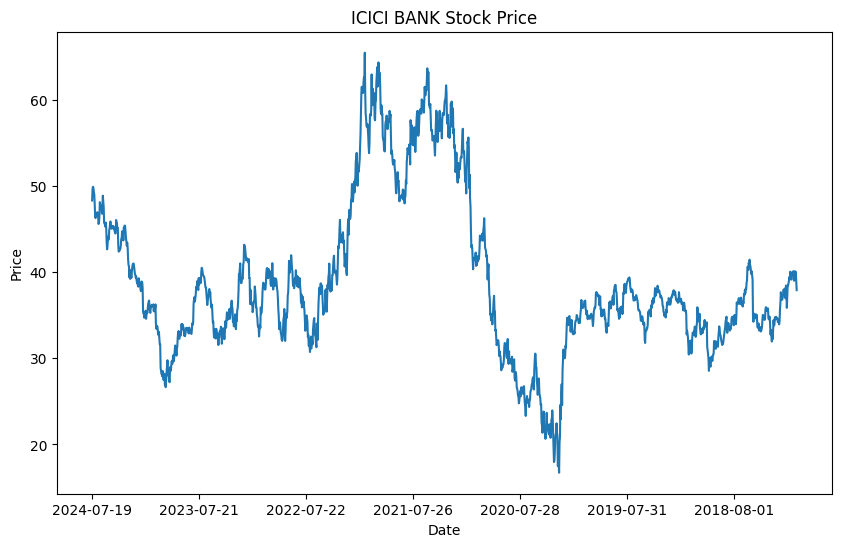

In [ ]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
GM_data = pd.read_csv('/content/GM_stock_2018_to_2024.csv')

# set the date as the index
GM_data.set_index('Date',inplace=True)
GM_data.head()
# and then sperate the close price
close_price = GM_data['Close']
# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='INFY',title='ICICI BANK Stock Price',figsize=(10,6))

<Axes: title={'center': 'ICICI BANK Stock Price'}, xlabel='Date', ylabel='Price'>

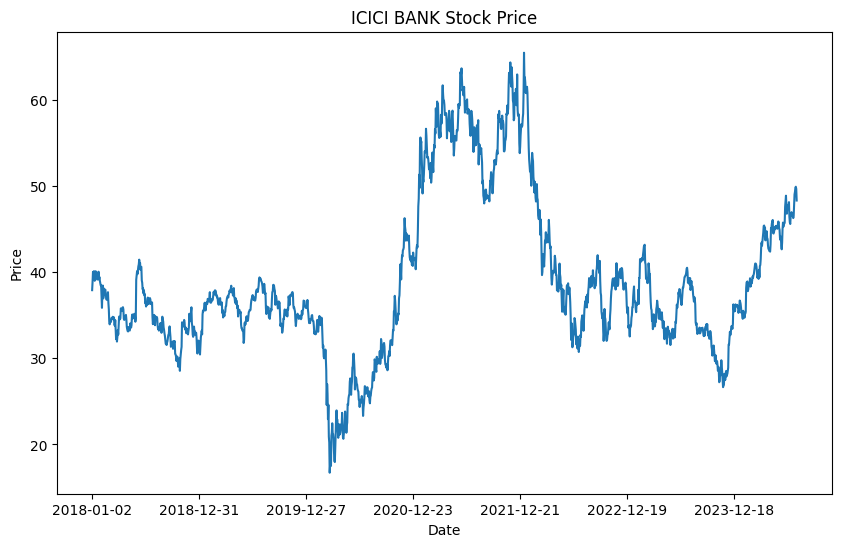

In [ ]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
GM_data = pd.read_csv('/content/GM_stock_2018_to_2024.csv')

# set the date as the index
GM_data.set_index('Date',inplace=True)
GM_data.sort_index(ascending=True,inplace=True)
GM_data.head()
# and then sperate the close price
close_price = GM_data['Close']
# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='INFY',title='ICICI BANK Stock Price',figsize=(10,6))

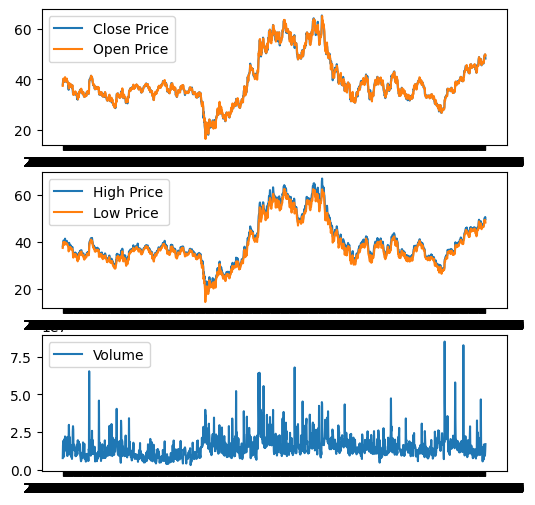

In [ ]:
#We, meed to show the values of the Subplot of data: 'SYMBOLS','CLOSE','HIGH','LOW','OPEN'.
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np;

#Now, we have to subplot the values of the graph.
plt.figure(1,figsize=(6,6));

plt.subplot(3,1,1);
plt.plot(GM_data['Close'],label='Close Price');
plt.plot(GM_data['Open'],label='Open Price');
plt.legend();

plt.subplot(3,1,2);
plt.plot(GM_data['High'],label='High Price');
plt.plot(GM_data['Low'],label='Low Price');
plt.legend();

plt.subplot(3,1,3);
plt.plot(GM_data['Volume'],label='Volume');
plt.legend();

# >> Showing the Values of the Moving Averages. ON ICIC BANK.

In [ ]:
#Showing the Movinf Averages.
GM_data.head();

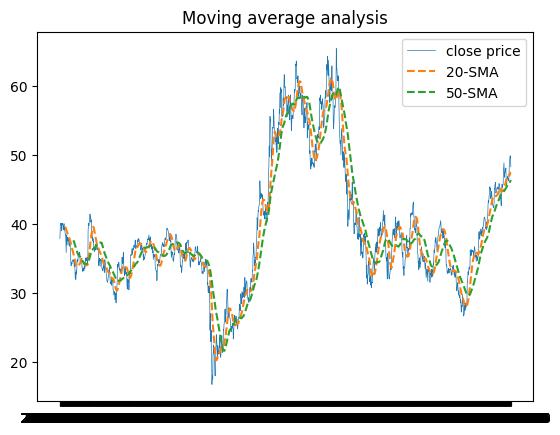

In [ ]:
#Now, Calculating the Values of the Moving Average.
# calulate the moving average
GM_data['SMA_20'] = GM_data['Close'].rolling(20).mean()
GM_data['SMA_50'] = GM_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(GM_data['Close'],label='close price',linewidth=0.5)
plt.plot(GM_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(GM_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()

#Relative Strength Index.

In [ ]:
!pip install ta;

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=4bfe611b7b408c0405df22ab535e27896c1b19b83637c1012906604878b20887
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import ta;
GM_data['RSI'] = ta.momentum.RSIIndicator(GM_data['Close'], window=14);
GM_data.head();

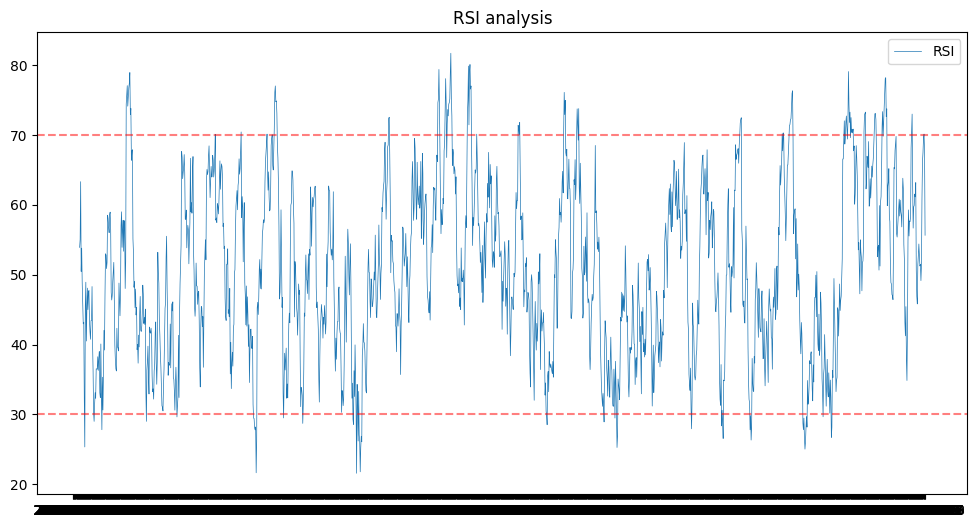

In [ ]:
# relative strength index
GM_data['RSI'] = ta.momentum.rsi(GM_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(GM_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend();
GM_data.tail();

In [ ]:
# prompt: save the file in  anther file

GM_data.to_csv('/content/GM_stock_2018_to_2024_updated.csv')


===================================== GM (ICIC)-BANK COMPLETED! ==========================

#Task-2:

--> 1. Consider the 3-Years of Infosys Data.

--> 2. 2018-2019-2020.

--> 3. Try and fit the 'ARIMA' and 'SARIMA'.

--> 4. FORELIST-> 1MONTH DATA.

--> 5. Super in Base of the Actual data.

In [ ]:
#Importing the Inbuilt Libraries.
from statsmodels.tsa import seasonal,arima_model;
import pandas as pd;
import numpy as np;

#Importing the Values of the Data.
data=pd.read_csv("/content/INFOSYS_stock_2018_to_2024 (1).csv");

#printing the Values of the data.
print("\n 1. Total Length of the Data: ",data.shape);
data.head();


 1. Total Length of the Data:  (1647, 8)


In [ ]:
#Information of the Data Values.
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1647 non-null   int64  
 1   Date        1647 non-null   object 
 2   Symbols     1647 non-null   object 
 3   Close       1647 non-null   float64
 4   High        1647 non-null   float64
 5   Low         1647 non-null   float64
 6   Open        1647 non-null   float64
 7   Volume      1647 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 103.1+ KB


In [ ]:
#Importing the Inbuilt Libraries.
from statsmodels.tsa import seasonal,arima_model
import pandas as pd
import numpy as np

#Importing the Values of the Data.
data=pd.read_csv("/content/INFOSYS_stock_2018_to_2024 (1).csv")

# Check the column names of your DataFrame
print(data.columns)

#Convert the Month Column into Text into the DataTime.
# Adjust the column name below if it's different in your data
data["Date"] = pd.to_datetime(data["Date"])  # Replace 'Month' with the actual column name if needed
data.head()

Index(['Unnamed: 0', 'Date', 'Symbols', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')


,Unnamed: 0,Date,Symbols,Close,High,Low,Open,Volume
0,0,2024-07-19,INFY,21.68,21.87,21.31,21.31,16443577.0
1,1,2024-07-18,INFY,22.25,22.61,21.52,21.66,42176088.0
2,2,2024-07-17,INFY,20.53,20.68,20.46,20.54,14389190.0
3,3,2024-07-16,INFY,20.66,20.66,20.47,20.51,7137487.0
4,4,2024-07-15,INFY,20.31,20.41,20.17,20.17,11641712.0


In [ ]:
data.head(50);

In [ ]:
#Set the Month Column as the Index of the Pandas DataFiles.
data.set_index("Date",inplace=True);
data.head();

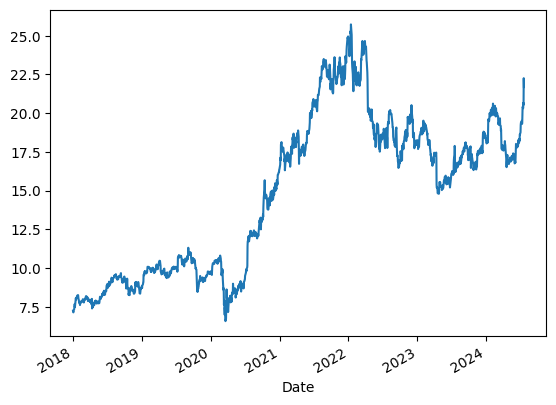

In [ ]:
import matplotlib.pyplot as plt;
data['Close'].plot();

#Task-3: Now, we have to make a function in order to ask the user to enter the name of the stck and then show the details of the selected Stock.

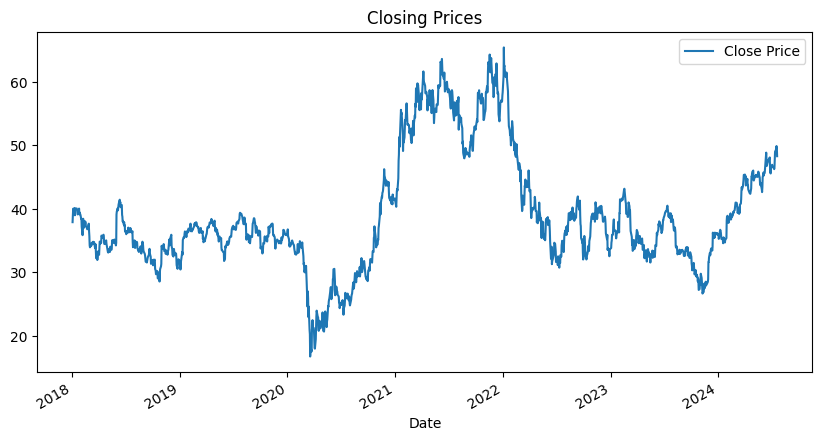

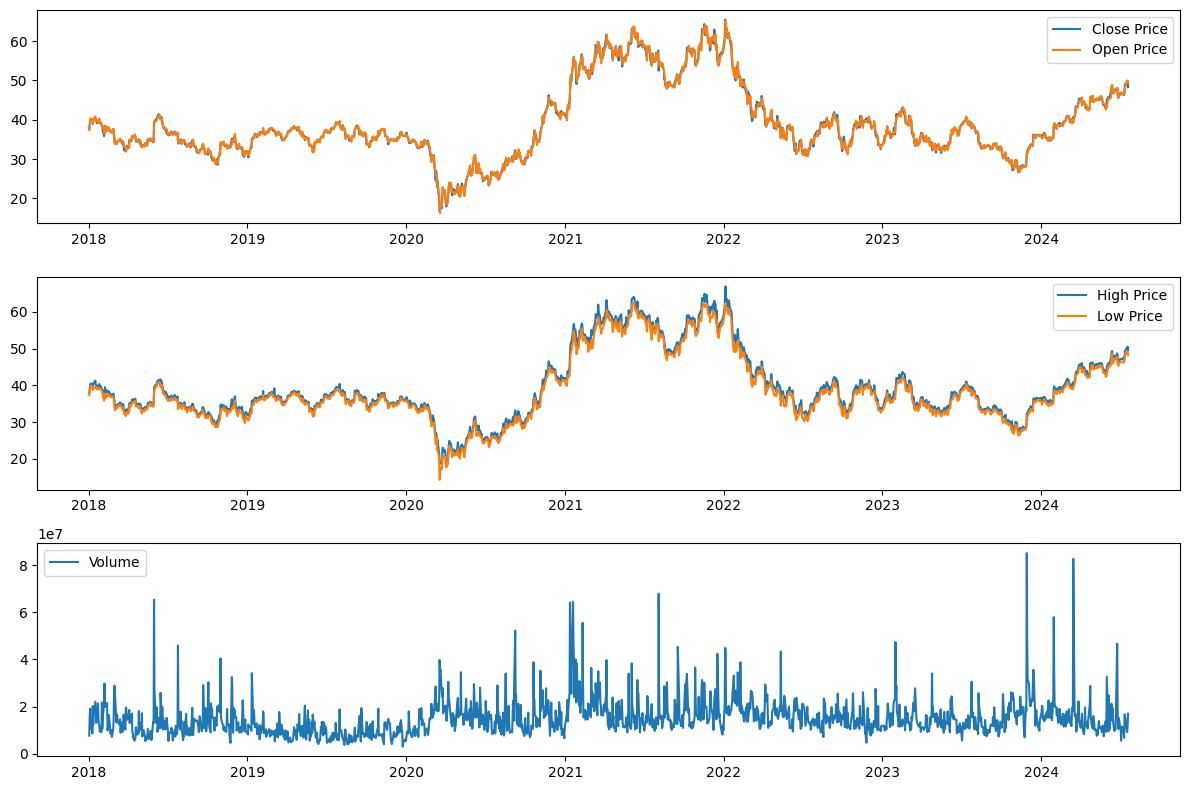

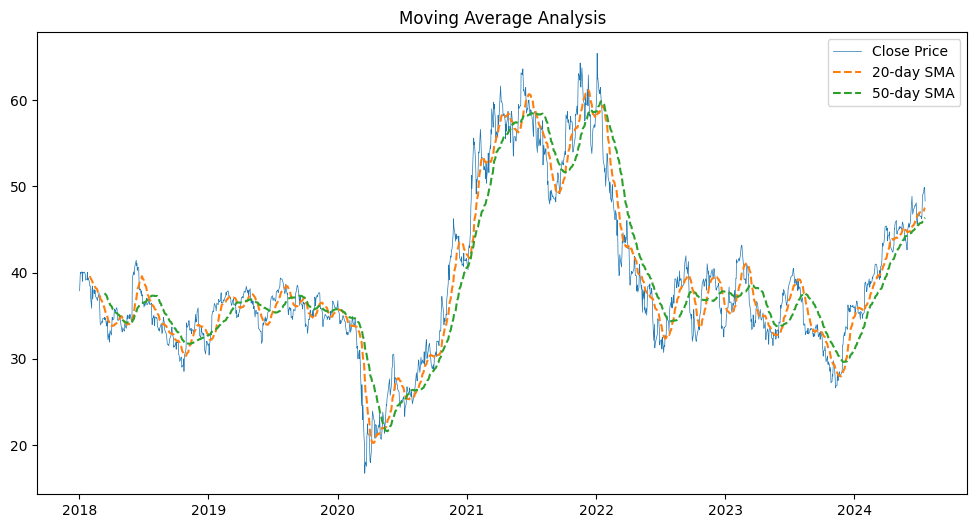

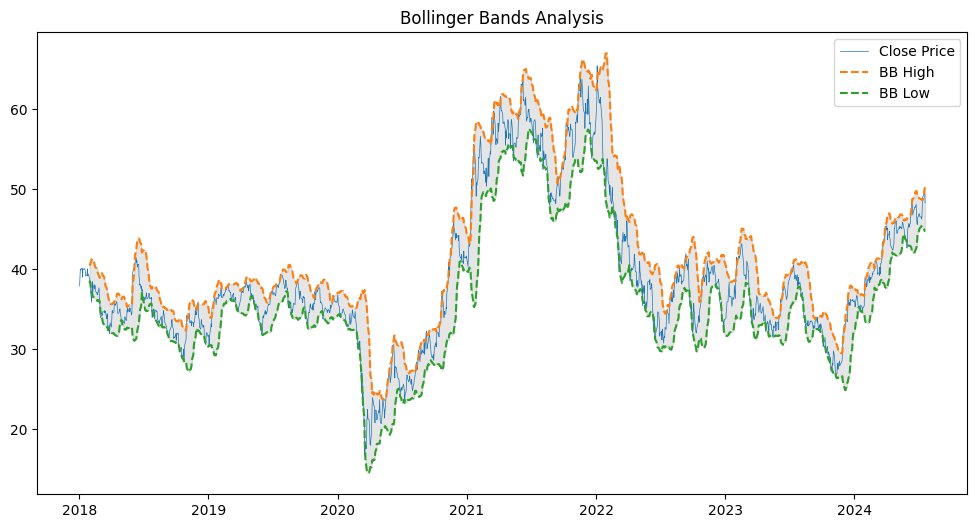

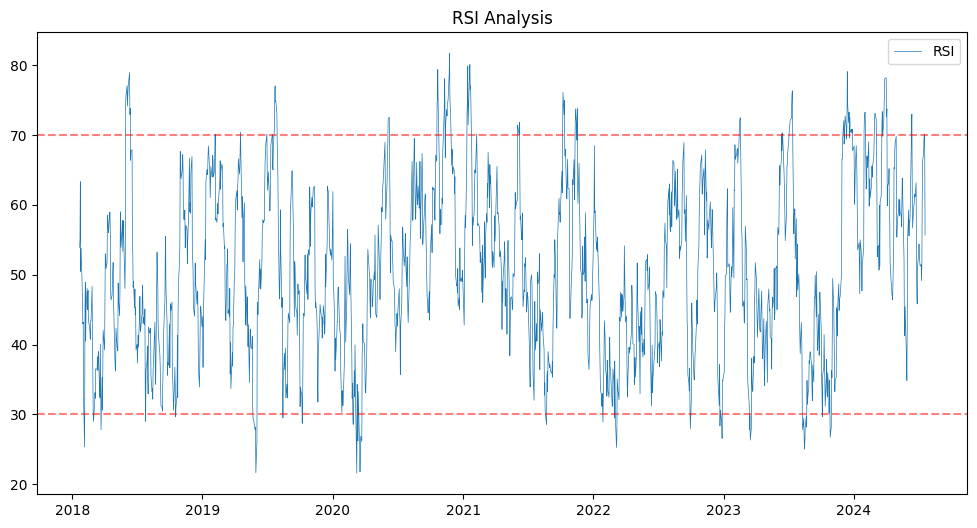

In [42]:
import pandas as pd;
import matplotlib.pyplot as plt;
import ta;

def analyze_stock_data(stock_data_file):
  # Read CSV file into DataFrame
  Comp_name = pd.read_csv(stock_data_file)


  # Set 'Date' column as index and sort by date
  Comp_name['Date'] = pd.to_datetime(Comp_name['Date'])
  Comp_name.set_index('Date', inplace=True)
  Comp_name.sort_index(ascending=True, inplace=True)

  # Plot 1: Closing Prices
  plt.figure(figsize=(10, 5))
  Comp_name['Close'].plot(label='Close Price')
  plt.title('Closing Prices')
  plt.legend()
  plt.show()

  # Plot 2: Multiple subplots for open, high, low, volume
  plt.figure(figsize=(12, 8))
  plt.subplot(3, 1, 1)
  plt.plot(Comp_name['Close'], label='Close Price')
  plt.plot(Comp_name['Open'], label='Open Price')
  plt.legend()
  plt.subplot(3, 1, 2)
  plt.plot(Comp_name['High'], label='High Price')
  plt.plot(Comp_name['Low'], label='Low Price')
  plt.legend()
  plt.subplot(3, 1, 3)
  plt.plot(Comp_name['Volume'], label='Volume')
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Calculate moving averages
  Comp_name['SMA_20'] = Comp_name['Close'].rolling(20).mean()
  Comp_name['SMA_50'] = Comp_name['Close'].rolling(50).mean()

  # Plot moving averages
  plt.figure(figsize=(12, 6))
  plt.plot(Comp_name['Close'], label='Close Price', linewidth=0.5)
  plt.plot(Comp_name['SMA_20'], label='20-day SMA', linestyle='--')
  plt.plot(Comp_name['SMA_50'], label='50-day SMA', linestyle='--')
  plt.title('Moving Average Analysis')
  plt.legend()
  plt.show()

  # Calculate Bollinger Bands
  bb = ta.volatility.BollingerBands(Comp_name['Close'], window=20, window_dev=2)
  Comp_name['BB_High'] = bb.bollinger_hband()
  Comp_name['BB_Low'] = bb.bollinger_lband()

  # Plot Bollinger Bands
  plt.figure(figsize=(12, 6))
  plt.plot(Comp_name['Close'], label='Close Price', linewidth=0.5)
  plt.plot(Comp_name['BB_High'], label='BB High', linestyle='--')
  plt.plot(Comp_name['BB_Low'], label='BB Low', linestyle='--')
  plt.fill_between(Comp_name.index, Comp_name['BB_High'], Comp_name['BB_Low'], color='gray', alpha=0.2)
  plt.title('Bollinger Bands Analysis')
  plt.legend()
  plt.show()

  # Calculate RSI
  Comp_name['RSI'] = ta.momentum.rsi(Comp_name['Close'], window=14)

  # Plot RSI
  plt.figure(figsize=(12, 6))
  plt.plot(Comp_name['RSI'], label='RSI', linewidth=0.5)
  plt.axhline(70, linestyle='--', color='red', alpha=0.5)
  plt.axhline(30, linestyle='--', color='red', alpha=0.5)
  plt.title('RSI Analysis')
  plt.legend()
  plt.show()

  # Save updated DataFrame to a new CSV file
  Comp_name.to_csv('GM_stock_analysis_result.csv')

# Example usage:
analyze_stock_data('GM_stock_2018_to_2024.csv')




Enter your choice (GM/INY/TSL): gm


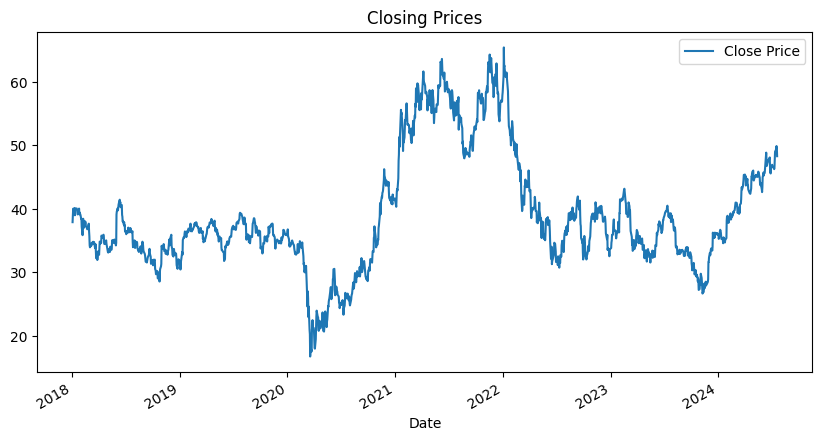

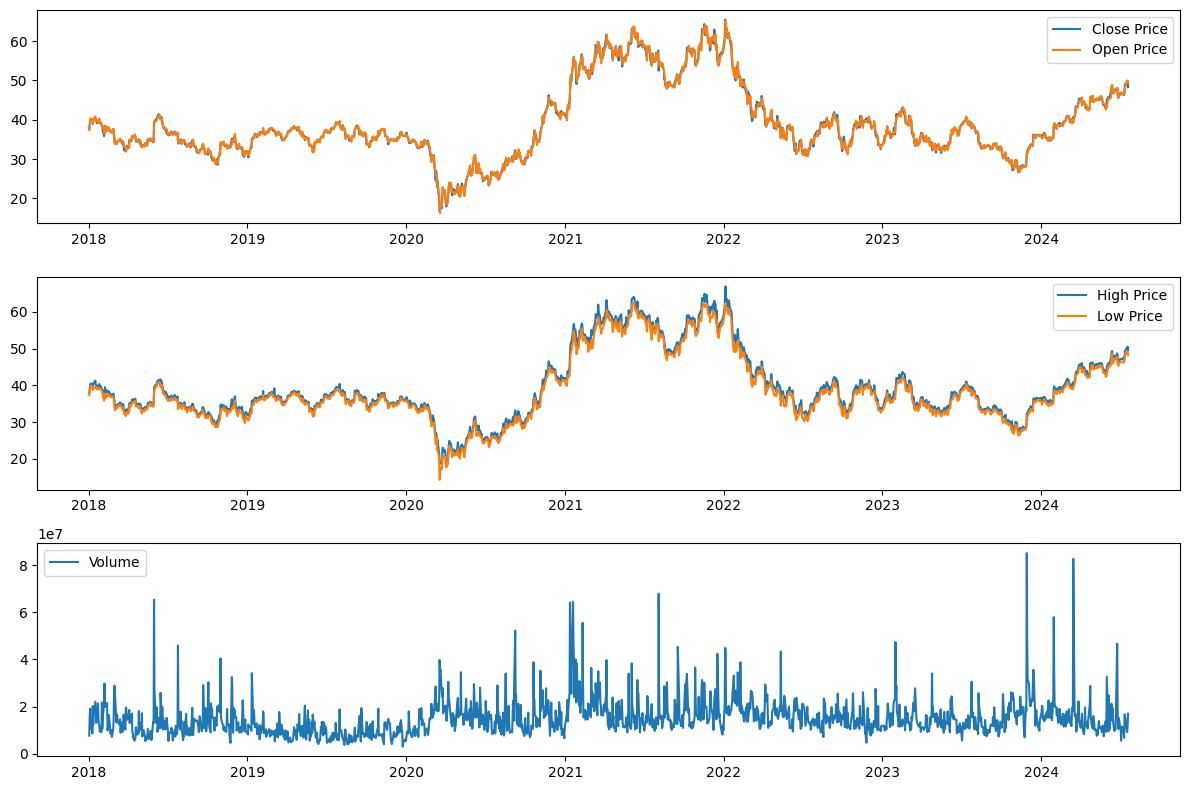

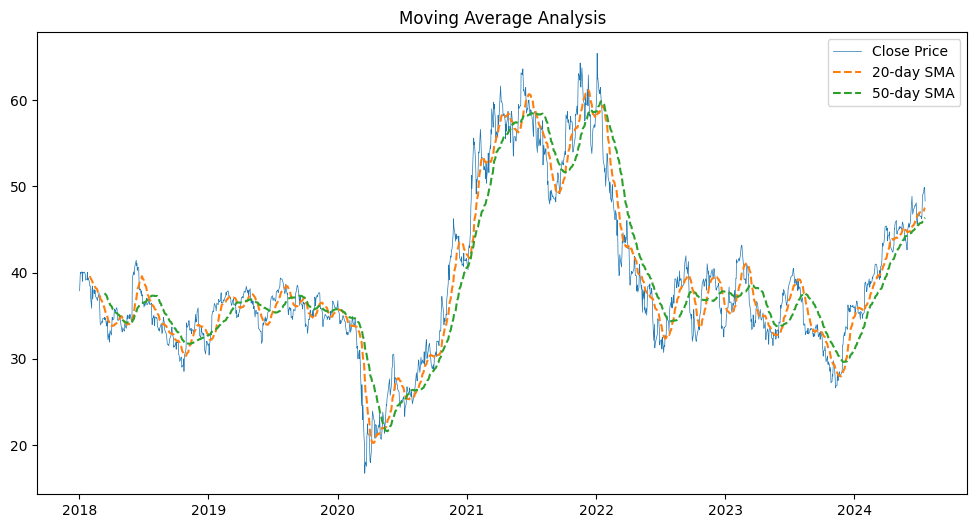

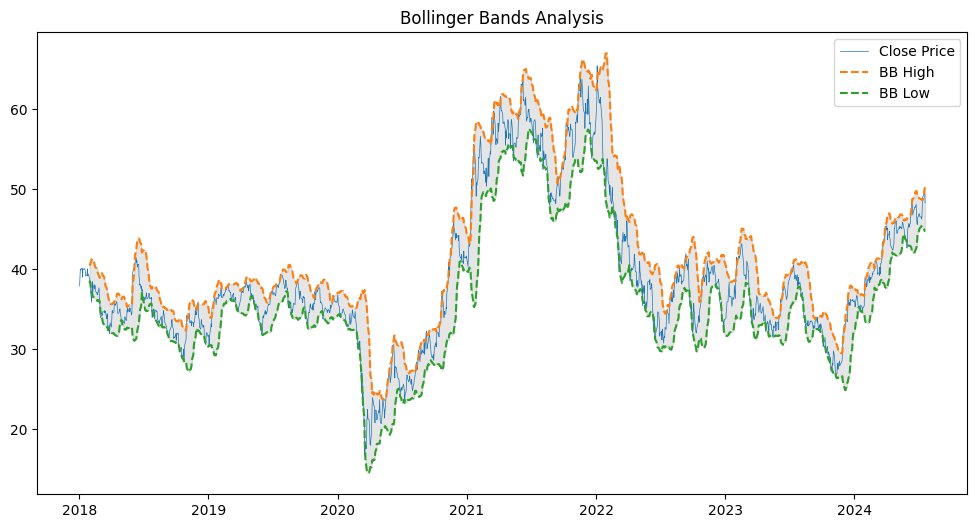

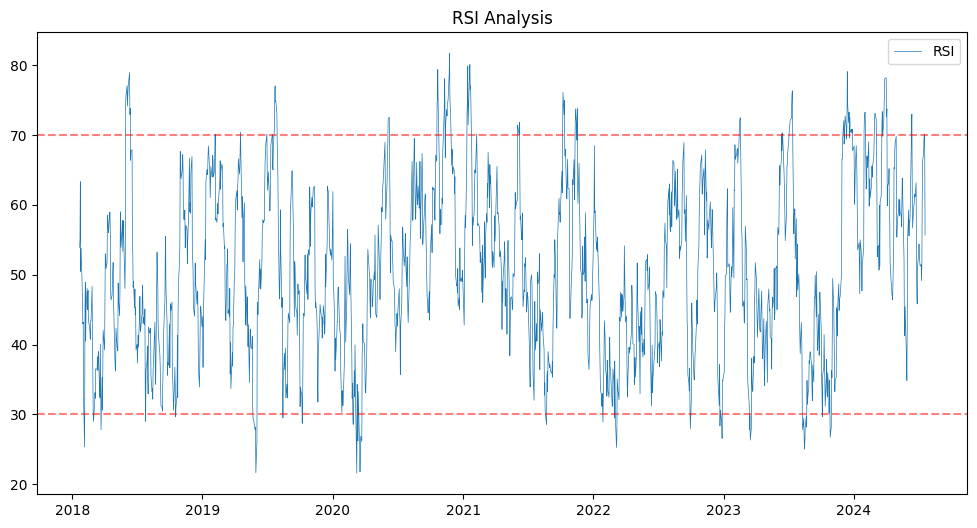




Enter your choice (GM/INY/TSL): iny


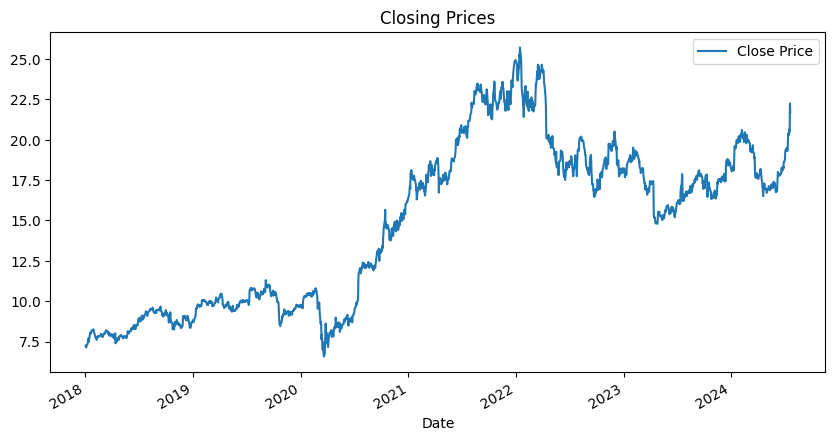

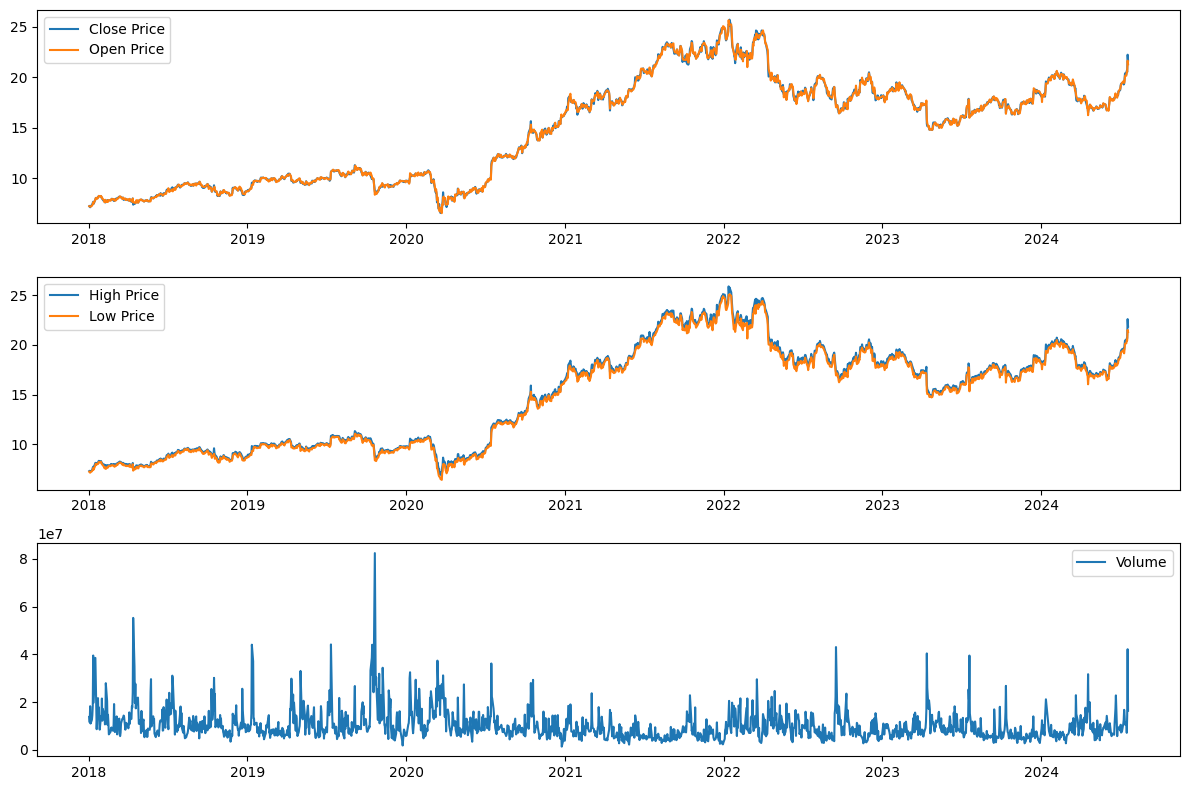

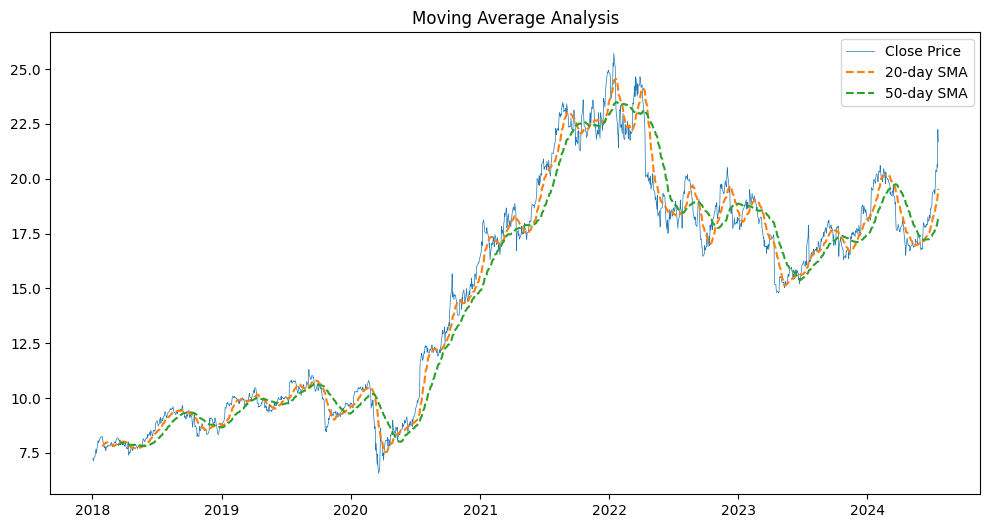

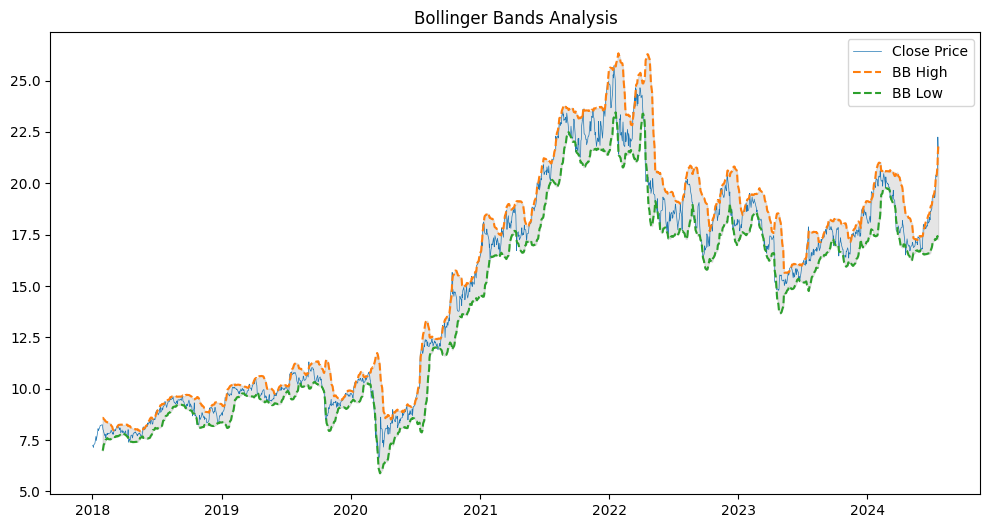

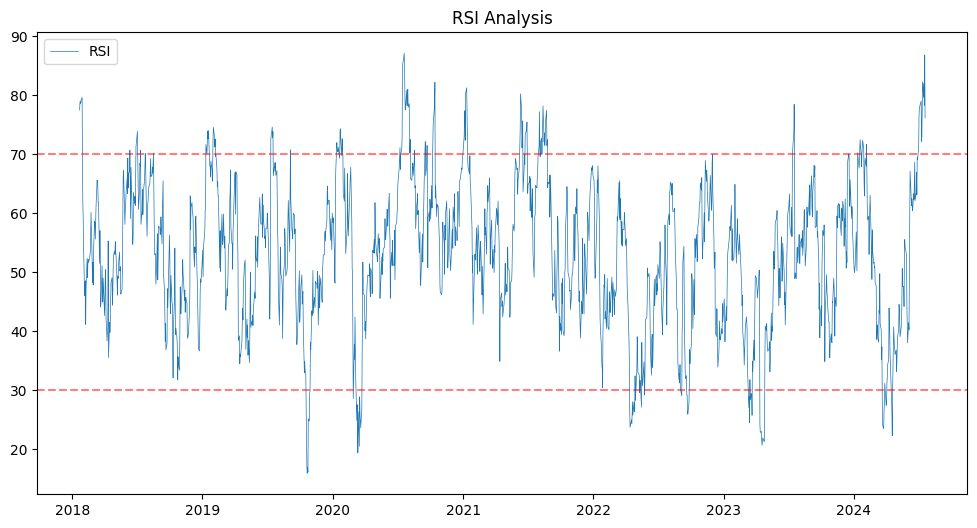




Enter your choice (GM/INY/TSL): tsl


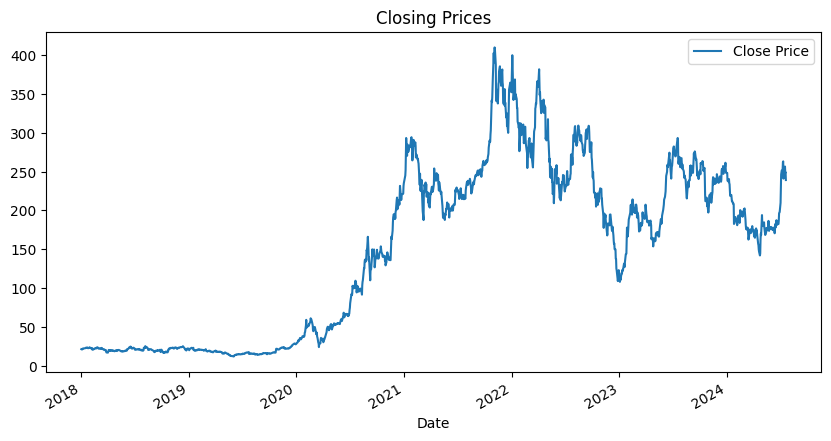

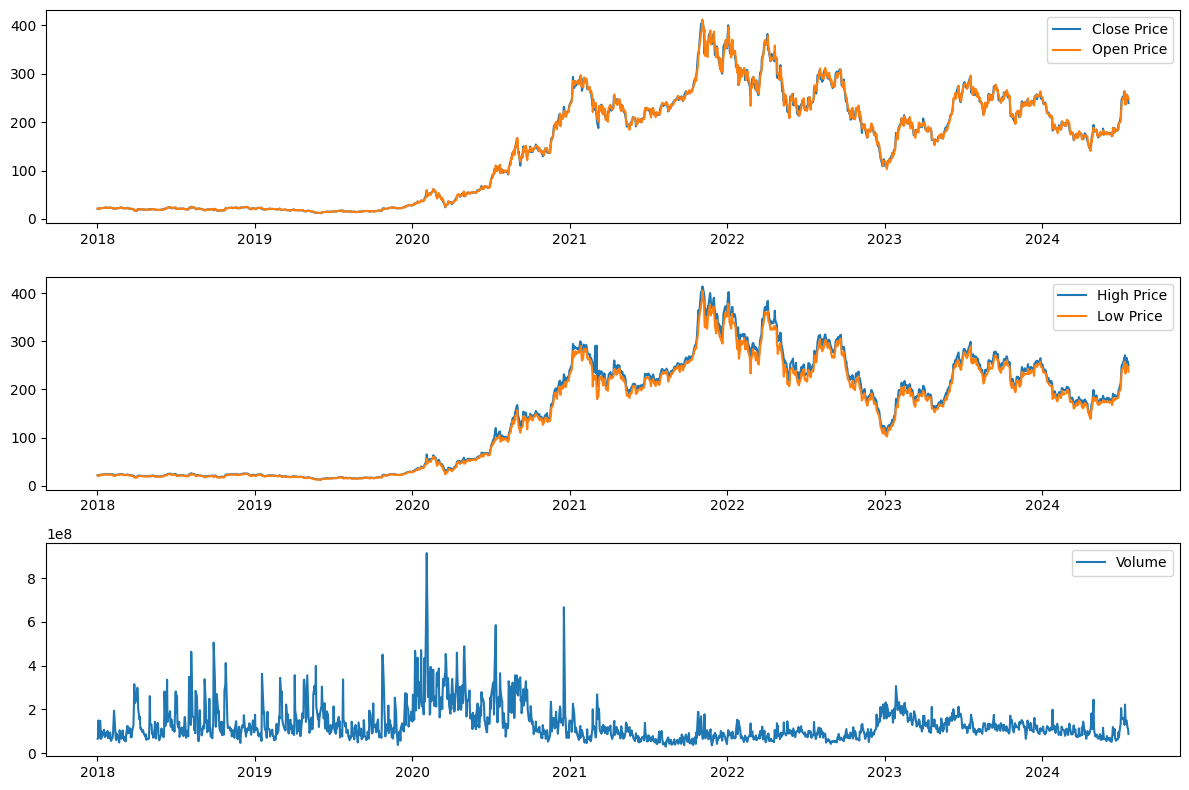

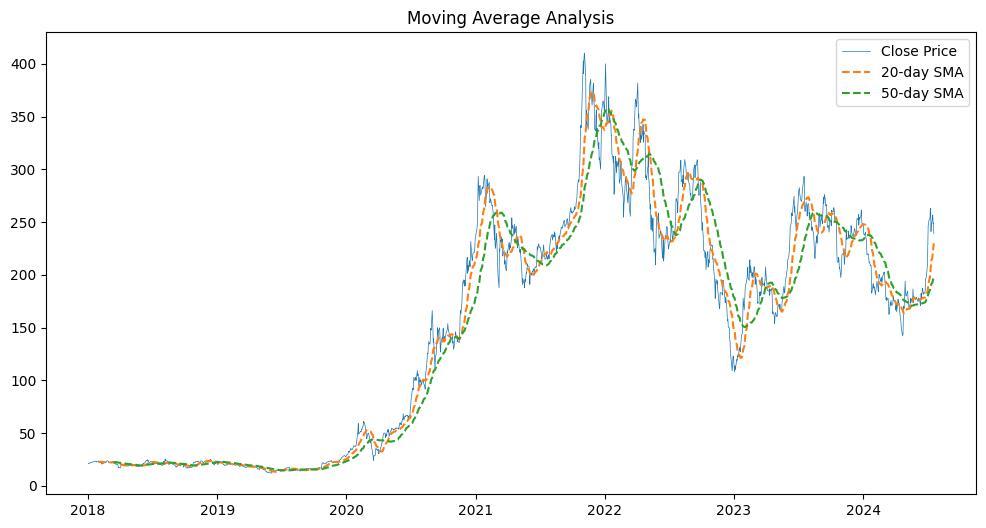

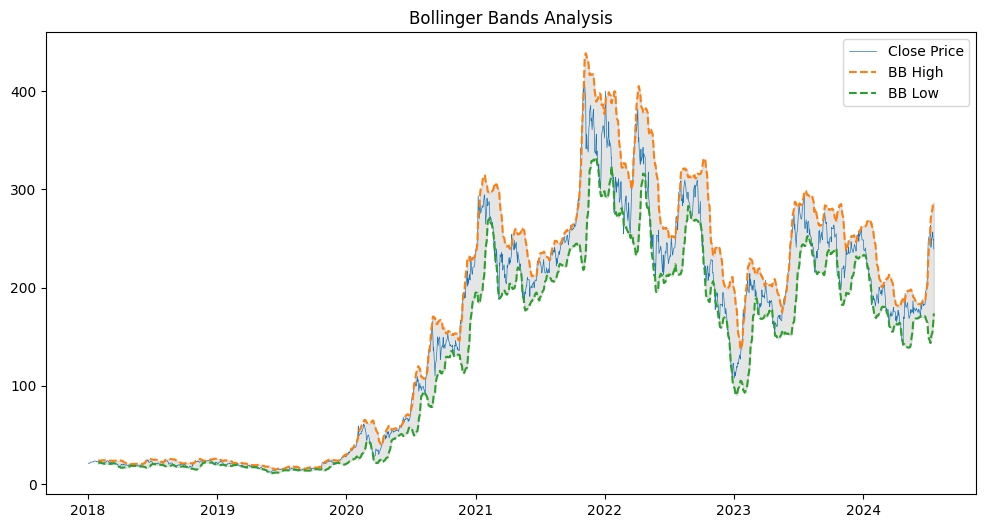

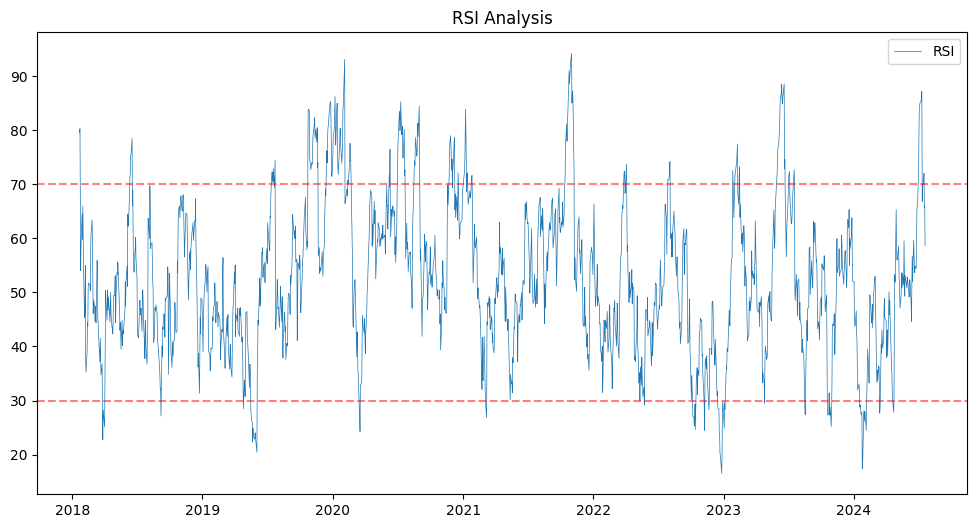




Enter your choice (GM/INY/TSL): dww
Invalid choice. Please enter a number between 1 and 4.



In [ ]:
import pandas as pd;
import matplotlib.pyplot as plt;
import ta;

def analyze_stock_data(stock_data_file):
  # Read CSV file into DataFrame
  Comp_name = pd.read_csv(stock_data_file)


  # Set 'Date' column as index and sort by date
  Comp_name['Date'] = pd.to_datetime(Comp_name['Date'])
  Comp_name.set_index('Date', inplace=True)
  Comp_name.sort_index(ascending=True, inplace=True)

  # Plot 1: Closing Prices
  plt.figure(figsize=(10, 5))
  Comp_name['Close'].plot(label='Close Price')
  plt.title('Closing Prices')
  plt.legend()
  plt.show()

  # Plot 2: Multiple subplots for open, high, low, volume
  plt.figure(figsize=(12, 8))
  plt.subplot(3, 1, 1)
  plt.plot(Comp_name['Close'], label='Close Price')
  plt.plot(Comp_name['Open'], label='Open Price')
  plt.legend()
  plt.subplot(3, 1, 2)
  plt.plot(Comp_name['High'], label='High Price')
  plt.plot(Comp_name['Low'], label='Low Price')
  plt.legend()
  plt.subplot(3, 1, 3)
  plt.plot(Comp_name['Volume'], label='Volume')
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Calculate moving averages
  Comp_name['SMA_20'] = Comp_name['Close'].rolling(20).mean()
  Comp_name['SMA_50'] = Comp_name['Close'].rolling(50).mean()

  # Plot moving averages
  plt.figure(figsize=(12, 6))
  plt.plot(Comp_name['Close'], label='Close Price', linewidth=0.5)
  plt.plot(Comp_name['SMA_20'], label='20-day SMA', linestyle='--')
  plt.plot(Comp_name['SMA_50'], label='50-day SMA', linestyle='--')
  plt.title('Moving Average Analysis')
  plt.legend()
  plt.show()

  # Calculate Bollinger Bands
  bb = ta.volatility.BollingerBands(Comp_name['Close'], window=20, window_dev=2)
  Comp_name['BB_High'] = bb.bollinger_hband()
  Comp_name['BB_Low'] = bb.bollinger_lband()

  # Plot Bollinger Bands
  plt.figure(figsize=(12, 6))
  plt.plot(Comp_name['Close'], label='Close Price', linewidth=0.5)
  plt.plot(Comp_name['BB_High'], label='BB High', linestyle='--')
  plt.plot(Comp_name['BB_Low'], label='BB Low', linestyle='--')
  plt.fill_between(Comp_name.index, Comp_name['BB_High'], Comp_name['BB_Low'], color='gray', alpha=0.2)
  plt.title('Bollinger Bands Analysis')
  plt.legend()
  plt.show()

  # Calculate RSI
  Comp_name['RSI'] = ta.momentum.rsi(Comp_name['Close'], window=14)

  # Plot RSI
  plt.figure(figsize=(12, 6))
  plt.plot(Comp_name['RSI'], label='RSI', linewidth=0.5)
  plt.axhline(70, linestyle='--', color='red', alpha=0.5)
  plt.axhline(30, linestyle='--', color='red', alpha=0.5)
  plt.title('RSI Analysis')
  plt.legend()
  plt.show()

  # Save updated DataFrame to a new CSV file
  Comp_name.to_csv('GM_stock_analysis_result.csv')

while True:
  '''
  print("Menu:")
  print(" 1. GM Stocks")
  print(" 2. INFOSYS Stocks")
  print(" 3. Tesla Stocks")
  print(" 4. Exit")
  '''
  print("\n====================================================");
  choice = input("\n\nEnter your choice (GM/INY/TSL): ")

  if choice == 'GM' or choice=='gm':
    analyze_stock_data('/content/GM_stock_2018_to_2024_updated.csv')  # Assuming you have this file
  elif choice == 'INY' or choice=='iny':
    analyze_stock_data('/content/INFOSYS_stock_2018_to_2024 (1).csv')  # Assuming you have this file
  elif choice == 'TSL' or choice=='tsl':
    analyze_stock_data('/content/Tesla_stock_2018_to_2024.csv')  # Replace with your Tesla data file
  else:
    print("Invalid choice. Please enter a number between (GM/INY/TSL)");
break;